In [284]:
import pandas as pd
test_df = pd.read_csv('test_measure.csv')

In [286]:
sub_df = pd.read_csv('subject-info.csv')

In [288]:
merged_df=pd.merge(test_df,sub_df, on='ID',how='inner')

In [292]:
merged_df.to_csv('merged_files.csv', index = False)

In [ ]:
#49.Identify the test name that had the shortest time duration. 

In [260]:

df = pd.DataFrame(test_df)
desiredclm = ['Speed','HR','VO2','VCO2','RR','VE']
new_df= df[desiredclm]
short_test=new_df.min()
shortest_test_name =short_test.idxmin()
shortest_test_value = short_test[shortest_test_name]
print(f"The test with the shortest duration is: {shortest_test_name}, with a value of {shortest_test_value}")
   


The test with the shortest duration is: Speed, with a value of 0.0


In [145]:
#50.What is the percentag difference in mean Carbon dioxide production between male and female athletes?
male_id=sub_df[sub_df['Sex']==0]['ID']
female_id=sub_df[sub_df['Sex']==1]['ID']

male_VCO2=test_df[test_df['ID'].isin(male_id)]['VCO2']
female_VCO2=test_df[test_df['ID'].isin(female_id)]['VCO2']

mean_malevco2= male_VCO2.mean()
mean_femalevco2=female_VCO2.mean()
percentage_diff=((mean_malevco2-mean_femalevoc2)/mean_femalevoc2)*100
print(f"Mean VOC2 Male:{mean_malevco2:.2f}")
print(f"Mean VOC2 Female:{mean_femalevco2:.2f}")
print(f"Percentage Difference:{percentage_diff:.2f}%")

Mean VOC2 Male:2487.79
Mean VOC2 Female:1724.72
Percentage Difference:44.24%


In [ ]:
#51.Calculate the Fitness Index, generate a bar chart of Fitness Index categories, and export it as SVG file.

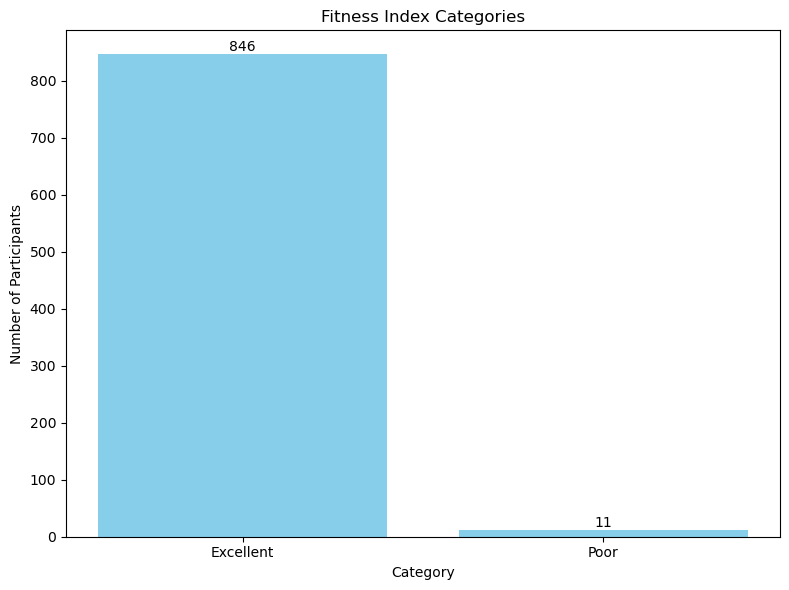

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

fitness_df = df.groupby('ID').agg({
    'VO2': 'max',
    'HR': 'max'
}).reset_index().rename(columns={'VO2': 'vo2_max', 'HR': 'hr_max'})

fitness_df['fitness_index'] = (fitness_df['vo2_max'] / fitness_df['hr_max']) * 100

def categorize_fitness(index):
    if index >= 55:
        return 'Excellent'
    elif index >= 45:
        return 'Good'
    elif index >= 35:
        return 'Average'
    else:
        return 'Poor'

fitness_df['category'] = fitness_df['fitness_index'].apply(categorize_fitness)

category_counts = fitness_df['category'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Fitness Index Categories')
plt.xlabel('Category')
plt.ylabel('Number of Participants')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("fitness_index_categories.svg", format='svg')
plt.show()

fitness_df.to_csv("fitness_index_per_participant.csv", index=False)

In [149]:
#52.arr=np.array([
    #[3, 5, 7, 9],   
    #[2, 0, 8, 10],  
    #[1, 4, 8, 12],  
   # [5, 9, 14, 15]  
#] )
#Transpose this numpy matrix. and calculate sum of each row after transposing. Find the row with highest sum(after transposing)
import numpy as np
arr = np.array([
    [3, 5, 7, 9],   
    [2, 0, 8, 10],  
    [1, 4, 8, 12],  
    [5, 9, 14, 15]  
])
transposed_arr = arr.T
print("Transposed Array:\n", transposed_arr)
row_sums = np.sum(transposed_arr, axis=1)
print("Row sums after transposing:", row_sums)
max_sum_index = np.argmax(row_sums)
print("Row with highest sum (index):", max_sum_index)
print("Highest sum:", row_sums[max_sum_index])
print("Row with highest sum:", transposed_arr[max_sum_index])

Transposed Array:
 [[ 3  2  1  5]
 [ 5  0  4  9]
 [ 7  8  8 14]
 [ 9 10 12 15]]
Row sums after transposing: [11 18 37 46]
Row with highest sum (index): 3
Highest sum: 46
Row with highest sum: [ 9 10 12 15]


In [171]:
#53.Display participant details with highest average cardiorespiratory fitness in terms of VO2 max.
max_vo2 = test_df['VO2'].max()
top_participants = df[df['VO2'] == max_vo2]
print("Participant(s) with highest VO2 Max:")
print(top_participants)

Participant(s) with highest VO2 Max:
        time  Speed     HR     VO2    VCO2    RR     VE ID_test   ID
273673   942   18.4  184.0  6217.0  7283.0  43.0  184.5   409_1  409


C:\Users\gomat\AppData\Local\Temp\ipykernel_10552\888769101.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hrr_series, shade=True, color='blue',fill=True)


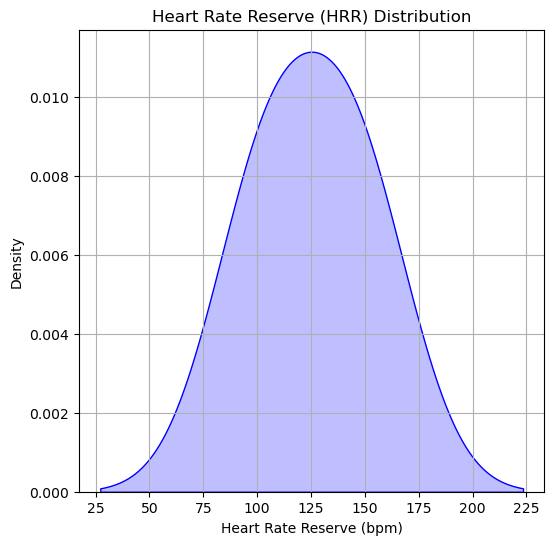

In [344]:
#54.calculate the heart rate reserve and show the distribution as density plot 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test_df['MaxHR'] = 220 - sub_df['Age']

resting_hr = test_df.groupby('ID')['HR'].min()

max_hr = test_df.groupby('ID')['MaxHR'].first()

hrr_series = max_hr - resting_hr

plt.figure(figsize=(6,6))
sns.kdeplot(hrr_series, shade=True, color='blue',fill=True)
plt.title('Heart Rate Reserve (HRR) Distribution')
plt.xlabel('Heart Rate Reserve (bpm)')
plt.ylabel('Density')
plt.grid(True)
plt.show()



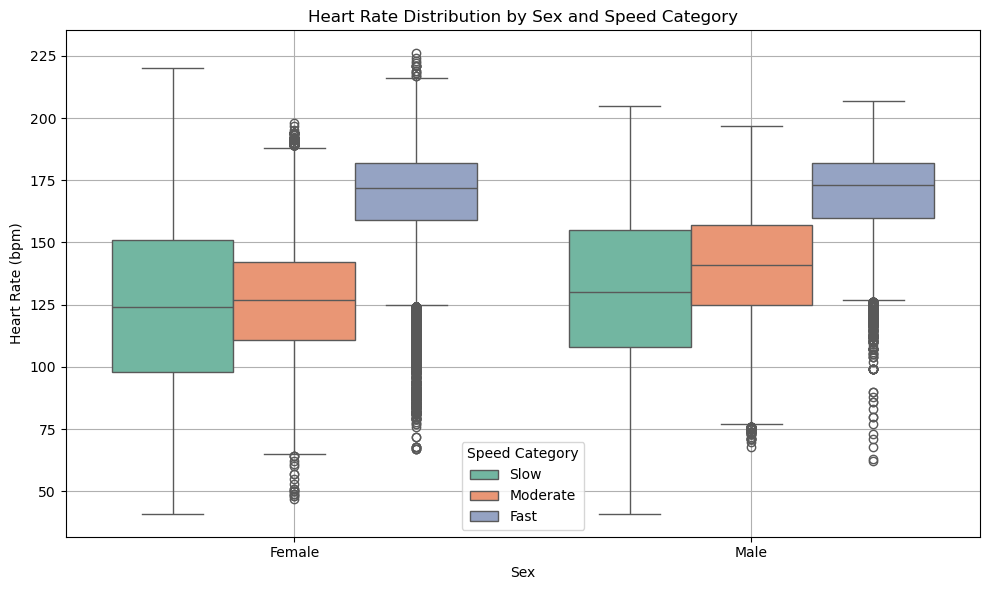

In [368]:
#55.Create a boxplot comparing heart rates between males and females, showing hue as speed category.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
merged_df=pd.merge(test_df,sub_df, on='ID',how='inner')
merged_df['speed_category'] = pd.cut(
    merged_df['Speed'],
    bins=[0, 5, 10, 20],  
    labels=['Slow', 'Moderate', 'Fast']
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_df,
    x='Sex',
    y='HR',
    hue='speed_category',
    palette='Set2'
)

plt.title('Heart Rate Distribution by Sex and Speed Category')
plt.xlabel('Sex')
plt.ylabel('Heart Rate (bpm)')
plt.legend(title='Speed Category')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#56.Choose any feature that follows a Gaussian distribution, convert it into a standard normal distribution, and visualize the results?

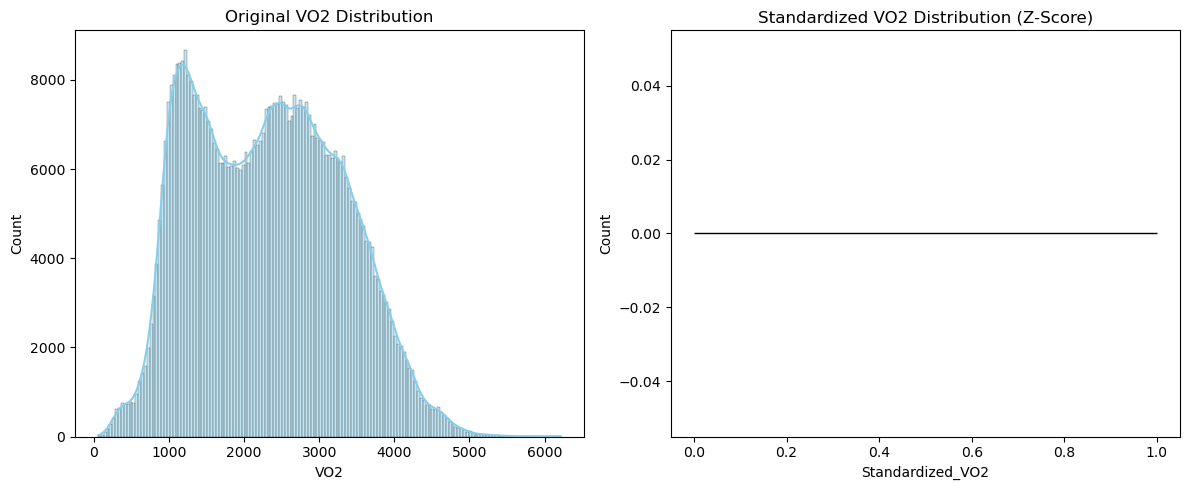

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


df = pd.DataFrame(test_df)
feature = 'VO2'

if feature in df.columns:
    df['Standardized_' + feature] = zscore(df[feature])
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Original {feature} Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(df['Standardized_' + feature], kde=True, color='salmon')
    plt.title(f'Standardized {feature} Distribution (Z-Score)')

    plt.tight_layout()
    plt.show()
else:
    print(f"Feature '{feature}' not found in DataFrame.")

In [ ]:
#57.Identify the participant who has taken maximum number of Graded Exercise test and justify.

In [366]:
import pandas as pd


df = pd.DataFrame(test_df)
df['time'] = pd.to_datetime(df['time'])


df = df.sort_values(by=['ID', 'time']).reset_index(drop=True)

df['time_diff'] = df.groupby('ID')['time'].diff()
df['new_test'] = (df['time_diff'] > pd.Timedelta(minutes=30)).astype(int)

df['test_num'] = df.groupby('ID')['new_test'].cumsum()

test_counts = df.groupby('ID')['test_num'].nunique().reset_index(name='test_count')

max_tests = test_counts.loc[test_counts['test_count'].idxmax()]


print(" Number of Graded Exercise Tests per participant:")
print(test_counts.sort_values(by='test_count', ascending=False))

print("\n Participant with maximum GETs:")
print(f"ID: {max_tests['ID']}, Tests Taken: {max_tests['test_count']}")



 Number of Graded Exercise Tests per participant:
      ID  test_count
0      1           1
563  564           1
565  566           1
566  567           1
567  568           1
..   ...         ...
289  290           1
290  291           1
291  292           1
292  293           1
856  857           1

[857 rows x 2 columns]

 Participant with maximum GETs:
ID: 1, Tests Taken: 1


In [ ]:
#58.For participant ID 725 show trend of  any three variables against time in a single canva

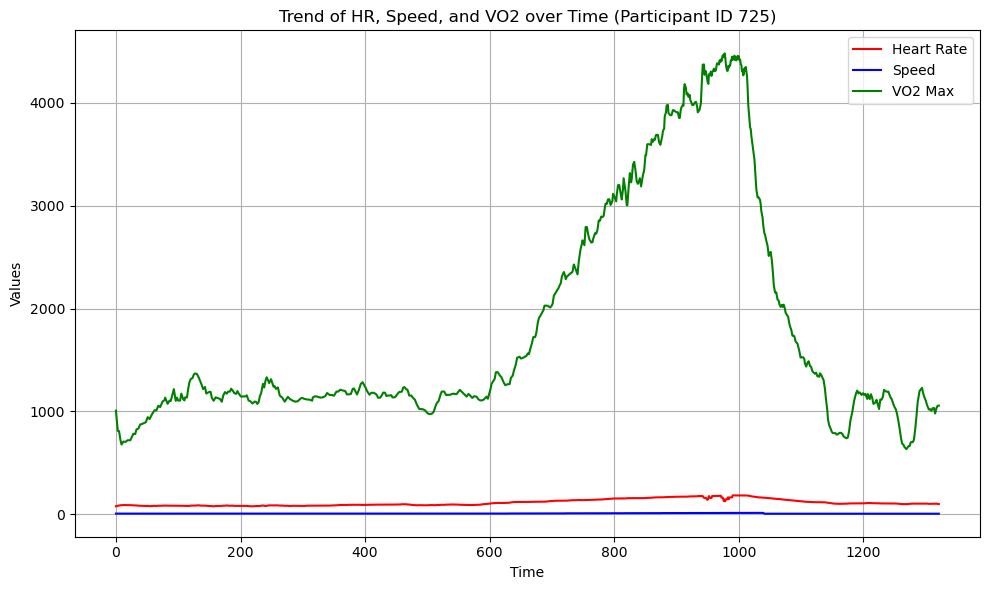

In [306]:
import pandas as pd
import matplotlib.pyplot as plt

participant_df = test_df[test_df['ID'] == 725]

participant_df = participant_df.sort_values(by='time')

plt.figure(figsize=(10, 6))

plt.plot(participant_df['time'], participant_df['HR'], label='Heart Rate', color='red')
plt.plot(participant_df['time'], participant_df['Speed'], label='Speed', color='blue')
plt.plot(participant_df['time'], participant_df['VO2'], label='VO2 Max', color='green')

plt.title('Trend of HR, Speed, and VO2 over Time (Participant ID 725)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#59.Create a scatter plot with a regression line using Altair, take a random sample data with features 'x' and 'y'.

In [372]:
import pandas as pd
import numpy as np
import altair as alt
np.random.seed(42)
x = np.random.rand(100) * 10  # 100 values between 0 and 10
y = 2.5 * x + np.random.randn(100) * 5  # Linear relation with noise

df = pd.DataFrame({'x': x, 'y': y})
scatter = alt.Chart(df).mark_circle(size=60, color='steelblue').encode(
    x='x',
    y='y',
    tooltip=['x', 'y']
).properties(
    title='Scatter Plot with Regression Line'
)
regression = scatter.transform_regression('x', 'y').mark_line(color='red')
final_plot = scatter + regression
final_plot
   

alt.LayerChart(...)

In [ ]:
#60.Use a strip plot to illustrate the distribution of Heart Rate Reserve (HRR) values, highlighting the lowest 
#and highest values to showcase the range of HRR

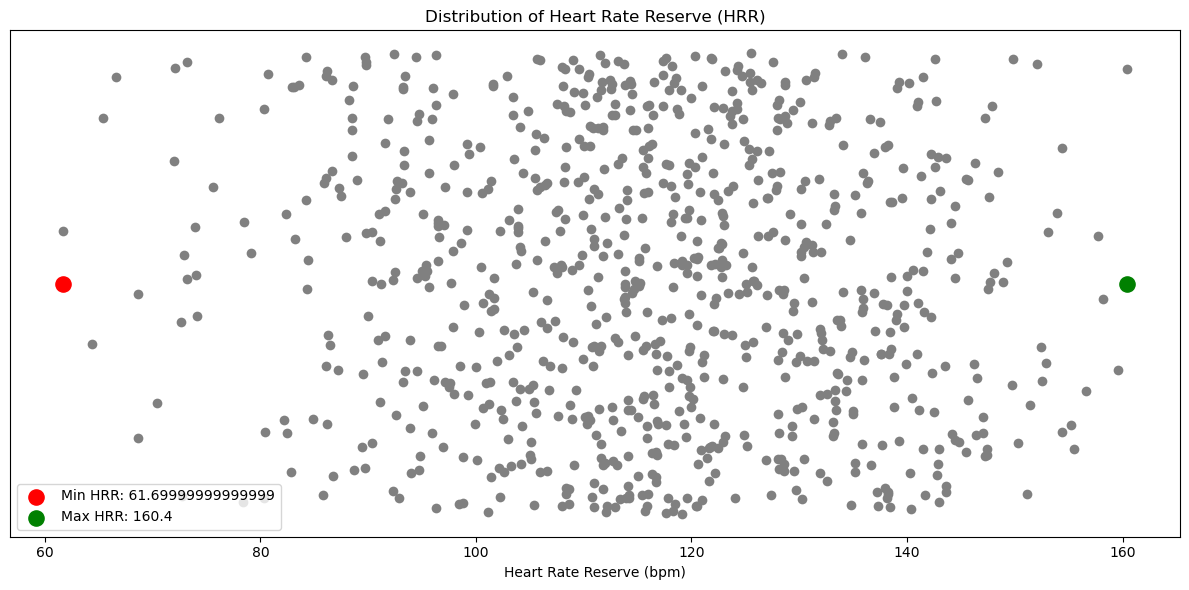

In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test_df['MaxHR'] = 220 - sub_df['Age']

test_df['resting_hr'] = test_df.groupby('ID')['HR'].min()

max_hr = test_df.groupby('ID')['MaxHR'].first()

test_df['HRR'] = test_df['MaxHR'] - test_df['resting_hr']
min_val = test_df['HRR'].min()
max_val = test_df['HRR'].max()
min_idx =test_df['HRR'].idxmin()
max_idx =test_df['HRR'].idxmax()

plt.figure(figsize=(12, 6))
sns.stripplot(x='HRR', data=test_df, size=7, color='gray', jitter=True)

# Highlight min and max
plt.scatter(test_df.loc[min_idx, 'HRR'], 0, color='red', s=120, label=f'Min HRR: {min_val}')
plt.scatter(test_df.loc[max_idx, 'HRR'], 0, color='green', s=120, label=f'Max HRR: {max_val}')

plt.title('Distribution of Heart Rate Reserve (HRR)')
plt.xlabel('Heart Rate Reserve (bpm)')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#61.Create a swarm plot to visualize the relationship between humidity and temperature for each gender.

C:\Users\gomat\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


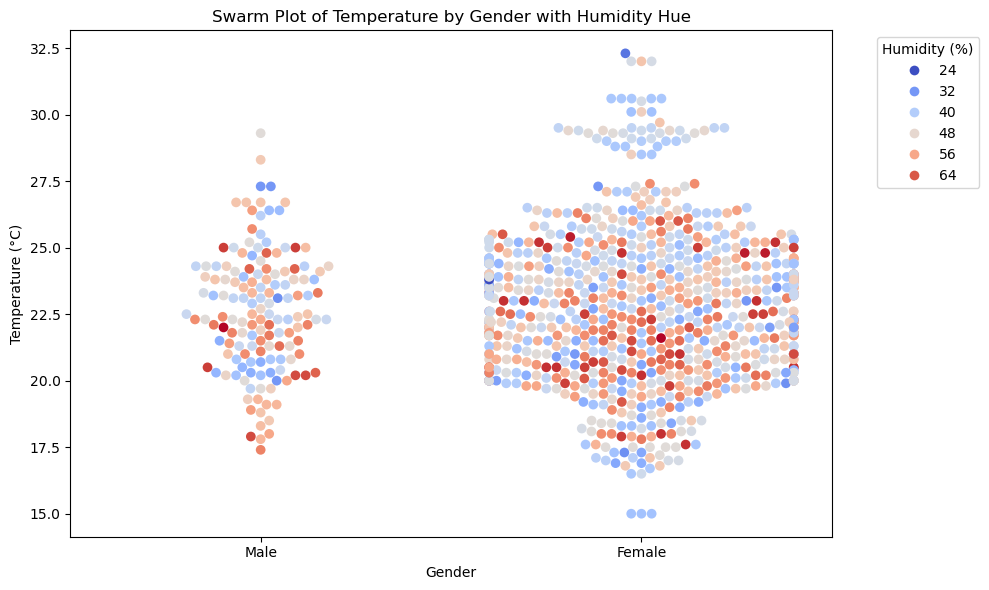

In [342]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df2 = pd.DataFrame(sub_df)
sub_df['Sex'] = sub_df['Sex'].map({0: 'Female', 1: 'Male'})
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='Temperature', hue='Humidity', data=sub_df, palette='coolwarm', size=7)

plt.title('Swarm Plot of Temperature by Gender with Humidity Hue')
plt.xlabel('Gender')
plt.ylabel('Temperature (°C)')
plt.legend(title='Humidity (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#62. Analyze the relationship between fitness levels and physiological attributes and identify trends
#in the scatter plot of VO2 max (ml/kg/min) versus age

C:\Users\gomat\AppData\Local\Temp\ipykernel_10552\3769534247.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


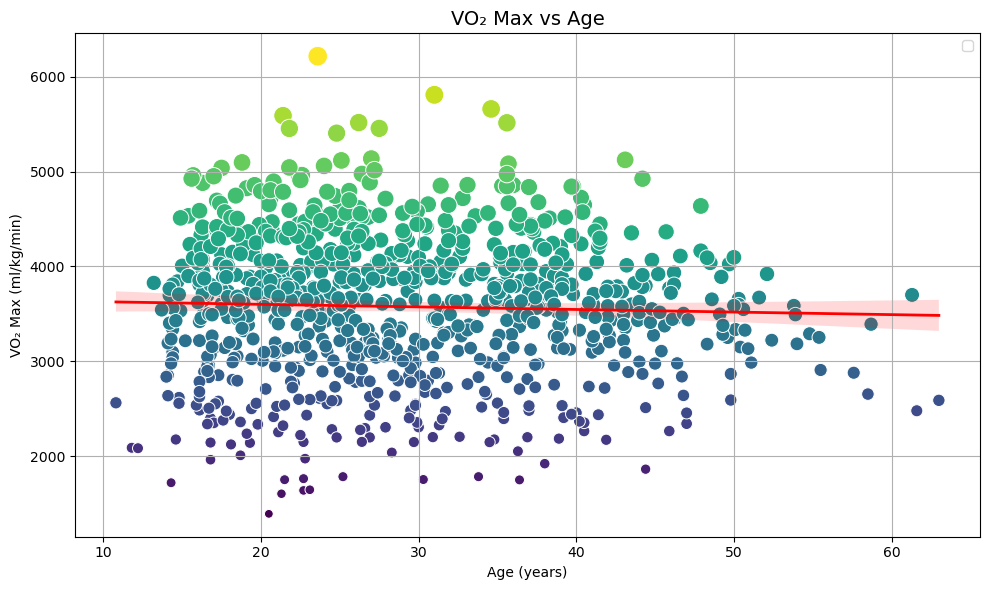

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df=pd.merge(test_df,sub_df, on='ID',how='inner')
vo2_max_df = merged_df.groupby('ID').agg({
    'VO2': 'max',
    'Age': 'first'  
}).reset_index().rename(columns={'VO2': 'vo2_max'})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=vo2_max_df,
    x='Age',
    y='vo2_max',
    hue='vo2_max',
    palette='viridis',
    size='vo2_max',
    sizes=(40, 200),
    legend=False
)

sns.regplot(
    data=vo2_max_df,
    x='Age',
    y='vo2_max',
    scatter=False,
    color='red',
    line_kws={'linewidth': 2, 'label': 'Trend'}
)

plt.title('VO₂ Max vs Age', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('VO₂ Max (ml/kg/min)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#63.Calculate the warm-up time, GET time, cool-down time, for each athlete test and find athlete who has maximum GET time ?

In [350]:
import pandas as pd

df = pd.DataFrame(test_df)
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(['ID', 'time']).reset_index(drop=True)

SPEED_THRESHOLD = 2.0  


results = []

for athlete_id, group in df.groupby('ID'):
    group = group.sort_values('time')

    get_start_idx = group[group['Speed'] > SPEED_THRESHOLD].first_valid_index()
    get_end_idx = group[group['Speed'] > SPEED_THRESHOLD].last_valid_index()

    if get_start_idx is None or get_end_idx is None:
        continue 

    warmup_start_time = group.iloc[0]['time']
    get_start_time = group.loc[get_start_idx, 'time']
    get_end_time = group.loc[get_end_idx, 'time']
    cooldown_end_time = group.iloc[-1]['time']

   
    warmup_time = (get_start_time - warmup_start_time).total_seconds() / 60
    get_time = (get_end_time - get_start_time).total_seconds() / 60
    cooldown_time = (cooldown_end_time - get_end_time).total_seconds() / 60

    results.append({
        'ID': athlete_id,
        'WarmUpTime_min': warmup_time,
        'GETTime_min': get_time,
        'CoolDownTime_min': cooldown_time
    })


summary_df = pd.DataFrame(results)
max_get_row = summary_df.loc[summary_df['GETTime_min'].idxmax()]

print("Per-Athlete Time Summary:")
print(summary_df)

print("\n Athlete with Maximum GET Time:")
print(max_get_row)

Per-Athlete Time Summary:
      ID  WarmUpTime_min   GETTime_min  CoolDownTime_min
0      1             0.0  1.666667e-08               0.0
1      2             0.0  1.666667e-08               0.0
2      3             0.0  0.000000e+00               0.0
3      4             0.0  0.000000e+00               0.0
4      5             0.0  0.000000e+00               0.0
..   ...             ...           ...               ...
852  853             0.0  0.000000e+00               0.0
853  854             0.0  1.666667e-08               0.0
854  855             0.0  1.666667e-08               0.0
855  856             0.0  1.666667e-08               0.0
856  857             0.0  0.000000e+00               0.0

[857 rows x 4 columns]

 Athlete with Maximum GET Time:
ID                  1.000000e+00
WarmUpTime_min      0.000000e+00
GETTime_min         1.666667e-08
CoolDownTime_min    0.000000e+00
Name: 0, dtype: float64


In [ ]:
#64.Compare the time it takes to multiply each element in a large array by 2 using an explicit loop and a 
#vectorized operation with NumPy

In [370]:
import time
arr_size = 575087
large_arr = np.random.rand(arr_size)


st_time = time.time()
res = []
for value in large_arr:
    res.append(value * 2)
end_time = time.time()

print(f"Loop Time: {end_time - st_time:.5f} seconds")

st_time_vector = time.time()
res_vector = large_arr * 2
end_time_vector = time.time()

print(f"Vectorized Time: {end_time_vector - st_time_vector:.5f} seconds")



Loop Time: 0.46782 seconds
Vectorized Time: 0.01201 seconds
